In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from scipy.stats import entropy

Utils

In [6]:
def decimal_to_binary(decimal, num_bits=8):
    return [int(bit) for bit in f"{decimal:0{num_bits}b}"]

def rule_transition(rule_number):
    return decimal_to_binary(rule_number)

def apply_rule_with_memory(current_row, previous_row, rule):
    extended_current = np.pad(current_row, pad_width=1, mode='wrap')
    extended_previous = np.pad(previous_row, pad_width=1, mode='wrap')
    
    new_row = []
    for i in range(1, len(extended_current) - 1):
        neighborhood = (extended_previous[i - 1], extended_previous[i], extended_previous[i + 1])
        index = 7 - (neighborhood[0] * 4 + neighborhood[1] * 2 + neighborhood[2])
        new_row.append(rule[index])
    return np.array(new_row)

def calculate_entropy(grid):
    flat_grid = grid.flatten()
    counts = np.bincount(flat_grid)
    probabilities = counts / len(flat_grid)
    return entropy(probabilities)



def simulate_meca(size, steps, rule_number, simulate_homogenous=False):
    grid = np.zeros((steps, size), dtype=int)
    # inicializácia
    if simulate_homogenous:
        grid[0, :] = 0
        grid[0, size // 2] = 1  # jeden bit zapnutý uprostred
    else:
        grid[0, :] = np.random.randint(0, 2, size)

    # pravidlo
    rule_bin = np.array([int(x) for x in np.binary_repr(rule_number, 8)], dtype=int)
    
    for t in range(1, steps):
        for i in range(size):
            left = grid[t-1, (i-1) % size]
            center = grid[t-1, i]
            right = grid[t-1, (i+1) % size]
            pattern = 7 - (left << 2 | center << 1 | right)
            grid[t, i] = rule_bin[pattern]

    return grid

def display_grid(grid, title="Cellular Automaton Simulation", save_path=None):
    plt.figure(figsize=(12, 6))
    plt.imshow(grid, cmap='binary', interpolation='nearest')
    plt.title(title)
    plt.xlabel("Cells")
    plt.ylabel("Time Step")
    plt.show()  # Always show the plot
    if save_path:
        plt.savefig(save_path)
    plt.close()

def classify_behavior(grid):
    unique_patterns = len(np.unique(grid, axis=0))
    ent = calculate_entropy(grid)

    if unique_patterns == 1:
        return "constant"
    elif unique_patterns < 10:
        return "periodic"
    elif unique_patterns > 50 and ent > 0.5:
        return "chaotic"
    else:
        return "complex"
    



four types of behavior

In [10]:
def run_all_meca_automata(size=100, steps=100, output_dir="meca_results"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    behaviors = {"constant": 0, "periodic": 0, "chaotic": 0, "complex": 0}

    for rule_number in range(256):
        grid = simulate_meca(size, steps, rule_number)
        behavior = classify_behavior(grid)
        behaviors[behavior] += 1

    for behavior, count in behaviors.items():
        print(f"{behavior.capitalize()} Behavior: {count} automata")
        
def run_specific_meca(rule_number, size=100, steps=100, simulate_homogenous=False):
    print(f"Simulating Rule {rule_number}")
    grid = simulate_meca(size, steps, rule_number, simulate_homogenous=simulate_homogenous)
    behavior = classify_behavior(grid)
    display_grid(grid, title=f"MECA Rule {rule_number}")

size = 100
steps = 100
run_all_meca_automata(size, steps)



Constant Behavior: 1 automata
Periodic Behavior: 79 automata
Chaotic Behavior: 148 automata
Complex Behavior: 28 automata


Simulating Rule 110


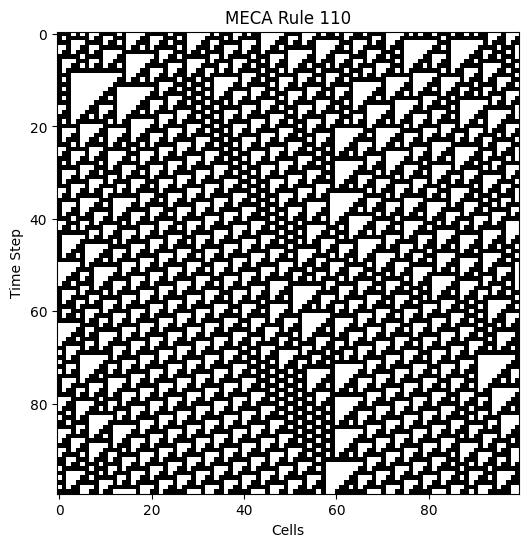

In [9]:
rule_number = 110
run_specific_meca(rule_number, size, steps, simulate_homogenous=False)

Simulating Rule 110


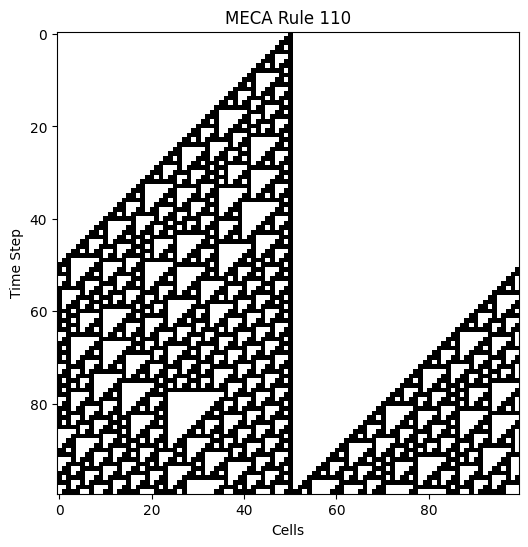

In [11]:
rule_number = 110
run_specific_meca(rule_number, size, steps, simulate_homogenous=True)

Simulating Rule 4


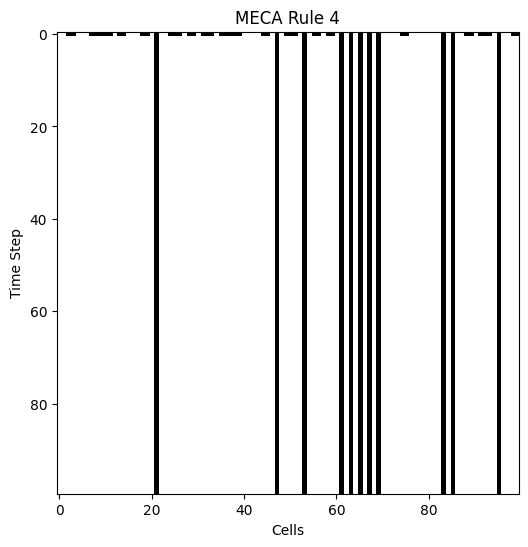

In [12]:
rule_number = 4
run_specific_meca(rule_number, size, steps, simulate_homogenous=False)

Simulating Rule 4


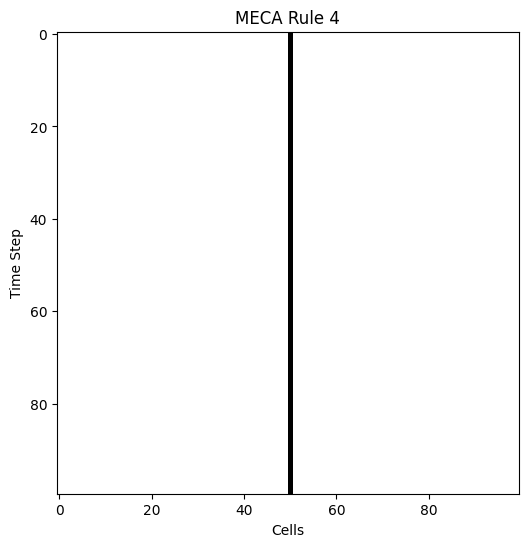

In [ ]:
rule_number = 4
run_specific_meca(rule_number, size, steps, simulate_homogenous=True)